author: Seraph Jin     
student number:s1032019        
supervisor: Arjen de vries and Agniszka    
institution: Radboud University


---

# The Notebook serves as a foundation for the formal and informal English text classifier

## Content
### 1. Data acquisition
### 2. Data pre-processing
### 3. Features extraction
### 4. Classification Process
### 5. Classification on Heterogeneous dataset.

--- 

## 1. Data acquisiion
Data processing from cvs to processible form
### 1.1 Libraries

In [1]:
import sys

!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#libraries
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.io
from sklearn import tree
nltk.download('punkt')
import neuralNetwork as nn
import spacy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Seraph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
nn.sigmoid(10)

0.9999546021312976

### 1.2 Formal DataBase: bbc-news

In [4]:
document_nr = 500
formal_data = pd.read_csv('data/formal/bbc/bbc-news-data.csv', header = 0, delimiter="\t", nrows=document_nr)
formal_data.values [3]
bodies = formal_data.values [:,3]
titles =  formal_data.values [:,2]
formal_articles = list(para.lower() for para in (titles + "." + bodies))
formal_sample  = formal_articles[0]

articles_size = []

for article in formal_articles:
    articles_size.append(len(article))

print("Total formal article",len(formal_articles))
print("average: ",np.average(articles_size))
print("max",np.max(articles_size))
print("min",np.min(articles_size))

Total formal article 500
average:  1987.244
max 5408
min 848


### 1.3 Informal Database: blog posts

In [5]:
informal_data = pd.read_csv('data/informal/blogpost/blogtext.csv', header = 0, delimiter=",", nrows=document_nr).values
informal_articles=  list(para.lower() for para in informal_data[:,7])
informal_sample = informal_articles[18]
informal_articles_size = []

for article in informal_articles:
    informal_articles_size.append(len(article))

print("Total number of informal text",len(informal_articles))
print("average: ",np.average(informal_articles_size))
print("max",np.max(informal_articles_size))
print("min",np.min(informal_articles_size))

Total number of informal text 500
average:  1505.21
max 25467
min 20


--- 


# 2. Data Pre-processing

For each article/text, we need to create two versions of array list. One that is separated by each word and one separated by each sentence.

In [6]:
formal_pronoun_list = [ "we", "they",   "their", "theirs", "themselves", "us", "our", "ours", "ourselves",  "it", "its", "itself" ] #, "it", "its", "itself" with it works beter?
informal_pronoun_list = ["I", "you","me", "my", "mine", "your", "yours", "myself", "yourself","yourselves"]
informal_word_list = []
formal_word_list = []
abbre_list = []
informal_punx = ["?", "!"]
pass_nr = act_nr  = avg_sentence_lenth = 0
punctuations = [",", ".", ";",":","-","\"","?","!","(",")"] #except for aphostrophy


In [7]:
# df  = pd.DataFrame(informal_articles)
# writer = pd.ExcelWriter('informal.xlsx', engine='xlsxwriter')
# df.to_excel(writer, sheet_name='first', index=False)
# writer.save()
def check_occur(word_list, word): #check the occurance of one word in a sentence 
    n = 0
    for w in word_list:
        w_new =  w.translate({ord(p): None for p in punctuations}) #get rid of the punctuations
        if word.lower() == w.lower():
            n = n + 1
    return n
            


def check_tone_nr(art, typ): # check the occurance a list of word appears in a sentence
    nr = 0
    art_w = art.split()
    for ele in typ:
        if ele.lower() in art_w:
            nr = nr + check_occur(art_w, ele.lower())
            
    return nr

def phrasal(verbs, sents): # count occurance of a specific phrasal verb
    nr_list = []
    for verb in verbs:
        nr_list.append(check_occur(sents, verb))
    return min(nr_list)

def check_word_phrasal(art_in_sent, typ): #count the total amount of phrasal verbs in the article
    nr = 0
    for sent in art_in_sent :
        word_in_sent  = sent.split()
        for ele in typ:
            if " " in ele: #if the word is a phrasal word
                #nr = nr + check_occur(word_in_sent, ele.lower())
                phrasal_verb  = ele.split()
                nr  = nr + phrasal(phrasal_verb,word_in_sent)
            else: nr = nr + check_occur(word_in_sent, ele.lower())
        
    return nr

def read_list(filename):  #read text file and return items in list
    result = []
    file = open(filename, encoding="utf8")
    lines = file.readlines()
    
    for line in lines:
        result.append(line.strip())
    
    return result

In [8]:
#pd.DataFrame(informal_data).to_csv("shortened.csv")

### 2.2 formal and informal dataset list as sentences

In [9]:
# without library list(filter(None,(item.strip() for item in informal_sample.split('. ')))) #in case of €5.6

formal_articles_in_sentences =   list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in formal_articles)
informal_articles_in_sentences =   list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in informal_articles)
sentence_nr_formal = np.array(list(len(ls) for ls in formal_articles_in_sentences), dtype=np.float)
sentence_nr_informal = np.array(list(len(ls) for ls in informal_articles_in_sentences), dtype=np.float)
informal_sample  = list(item.strip() for item in nltk.tokenize.sent_tokenize(informal_sample))
formal_sample  = list(item.strip() for item in nltk.tokenize.sent_tokenize(formal_sample))

#### 2.3 formal and informal dataset list as words 

In [10]:
# word_list_each_sentence_in_an_article_formal = []
# word_list_each_sentence_in_an_article_informal = [] 
# word_nr_formal = []
# word_nr_informal = []


# for para in formal_articles_in_sentences:
#     new_para = []
#     word_nr = []
#     for sent in para:
#         sent_in_word  = nltk.tokenize.word_tokenize(sent)
#         word_nr.append(len(sent_in_word))
#         new_para.append(sent_in_word)
#     word_nr_formal.append(word_nr)
#     word_list_each_sentence_in_an_article_formal.append(new_para)

# for para in informal_articles_in_sentences:
#     new_para = []
#     word_nr = []
#     for sent in para:
#         sent_in_word  = nltk.tokenize.word_tokenize(sent)
#         word_nr.append(len(sent_in_word))
#         new_para.append(sent_in_word)
#     word_nr_informal.append(word_nr)
#     word_list_each_sentence_in_an_article_informal.append(new_para)


#### 2.3.1.number for words in a sentence for each article

In [11]:
# word_number_formal_list = np.array(list(sum(para) for para in word_nr_formal),dtype=np.float)#= np.array(word_nr_formal), dtype=np.float)
# word_number_informal_list = np.array(list(sum(para) for para in word_nr_informal),dtype=np.float)#= np.array(word_nr_formal), dtype=np.float)

    

#### 2.4 Creating test an train datasets based on the index number 

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(formal_articles, y_encoded)
articles  = list(range(0,len(formal_articles) + len(informal_articles)))
Y = [1]*len(formal_articles) + [0]*len(informal_articles) # first 100 are formal, the last 100 are informal
X_train, X_test, y_train, y_test = train_test_split(articles, Y)

In [13]:
# test_in_sentences =   list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in X_test)
# train_in_sentences =   list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in X_train)

## 3. Feature Extraction

The following features are made to the dataset
1. Average letter per sentece
2. Average word per sentece
3. Tone(informal and formal pronouncs)
4. contractions and abbrevations
5. informal and informal list


In [14]:
fword_length  = np.array([len(art.split()) for art in formal_articles])
infword_length = np.array([len(art.split()) for art in informal_articles])

formal_letter_length  = np.array([len(art.translate({ord(p): None for p in punctuations}))  for art in formal_articles])
informal_letter_length  = np.array([len(art.translate({ord(p): None for p in punctuations}))  for art in informal_articles])

In [15]:
#pd.read_csv('data/informal/blogpost/blogtext.csv', header = 0, delimiter=",", nrows=100).values
formal_articles_in_sentences[9]

['court rejects $280bn tobacco case.',
 "a us government claim accusing the country's biggest tobacco companies of covering up the effects of smoking has been thrown out by an appeal court.",
 'the demand for $280bn (£155bn) - filed by the clinton administration in 1999 - was rejected in a 2-1 decision.',
 'the court in washington found that the case could not be brought under federal anti-racketeering laws.',
 'among the accused were altria group, rj reynolds tobacco, lorillard tobacco, liggett group and brown and williamson.',
 'in its case, the government claimed tobacco firms manipulated nicotine levels to increase addiction, targeted teenagers with multi-billion dollar advertising campaigns, lied about the dangers of smoking and ignored research to the contrary.',
 'prosecutors wanted the cigarette firms to surrender $280bn in profits accumulated over the past 50 years and impose tougher rules on marketing their products.',
 'but the court of appeals for the district of columbia r

### 3.1 average setence length per article (letters)

In [16]:
article_length_formal = np.array(list(len(para) for para in formal_articles), dtype=np.float)
article_length_informal = np.array(list(len(para) for para in informal_articles), dtype=np.float)
avg_letter_sentence_formal = article_length_formal/sentence_nr_formal
avg_letter_sentence_informal = article_length_informal/sentence_nr_informal
avg_formal_word_length =  formal_letter_length/ fword_length
avg_informal_word_length =  informal_letter_length/infword_length


Text(0.5, 0, 'index of article')

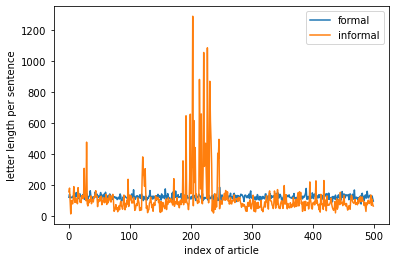

In [17]:
index  = np.arange(document_nr)
plt.plot(index, avg_letter_sentence_formal, label="formal")
plt.plot(index, avg_letter_sentence_informal, label="informal")
plt.legend()
plt.ylabel("letter length per sentence")
plt.xlabel("index of article")
#plt.savefig('letter.png')

In [18]:
# plt.plot(np.arange(200), avg_letter_sentence , label="average")
# plt.ylabel("letter length")
# plt.xlabel("index of article")

### 3.1.1 average setence length per article (words)

In [19]:
avg_word_sentence_formal = fword_length/sentence_nr_formal
avg_word_sentence_informal = infword_length/sentence_nr_informal

In [20]:
avg_word_sentence_formal[99]

20.11764705882353

In [21]:
#source: https://evrythngunder3d.wordpress.com/2020/07/20/exploring-python-modules-part-2/
# function to check the type of sentence
def checkForSentType(inputSentence):   
    # running the model on sentence
    getDocFile = nlp(inputSentence)
    
    # getting the syntactic dependency 
    getAllTags = [token.dep_ for token in getDocFile]
    
    # checking for 'agent' tag
    checkPassiveTest = any(['agent' in sublist for sublist in getAllTags])
    
    # checking for 'nsubjpass' tag
    checkPassiveTestTwo = any(['nsubjpass' in sublist for sublist in getAllTags])
    return checkPassiveTest or checkPassiveTestTwo

# Spacy model imported
nlp = spacy.load("en_core_web_sm")
def check_pass_art(article):
    nr = 0
    for sent in article:
        if checkForSentType(sent):
            nr = nr+1

    return nr

# # storing the result in a new file and converting to csv
# newDf = pd.DataFrame({'Sentences':sentences,'Answers':finalResult})

# newDf.to_csv('Sentence_Identified.csv')

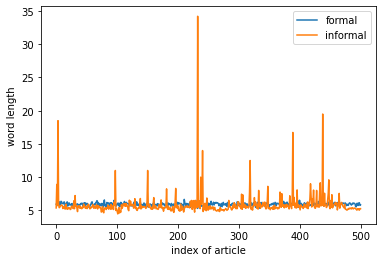

In [22]:
index  = np.arange(document_nr)
plt.plot(index, avg_formal_word_length, label="formal")
plt.plot(index, avg_informal_word_length, label="informal")
plt.legend()
plt.ylabel("word length")
plt.xlabel("index of article")
plt.savefig('word.png')

In [23]:
checkForSentType("The movie is going to be watched.")
#At dinner, six shrimp were eaten by Harry.
# A movie is going to be watched by us tonight.

False

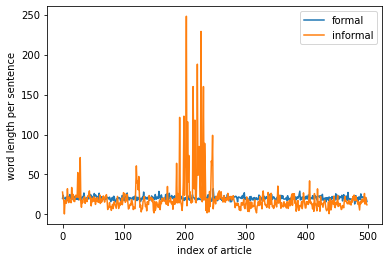

In [24]:
index  = np.arange(document_nr)
plt.plot(index, avg_word_sentence_formal, label="formal")
plt.plot(index, avg_word_sentence_informal, label="informal")
plt.legend()
plt.ylabel("word length per sentence")
plt.xlabel("index of article")
plt.savefig('word.png')

### 3.2 Average passive voice per article.

In [25]:
formal_pass = list(check_pass_art(para) for para in formal_articles_in_sentences)
informal_pass = list(check_pass_art(para) for para in informal_articles_in_sentences)
norm_formal_pass = formal_pass/sentence_nr_formal
norm_informal_pass = informal_pass/sentence_nr_informal

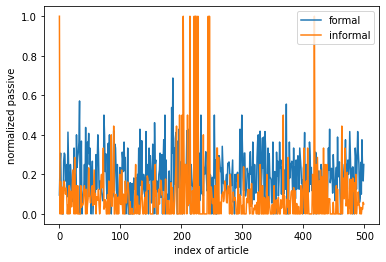

In [26]:
index  = np.arange(document_nr)
plt.plot(index, norm_formal_pass, label="formal")
plt.plot(index, norm_informal_pass, label="informal")
plt.legend()
plt.ylabel("normalized passive")
plt.xlabel("index of article")
plt.savefig('passive.png')

### 3.3 Tone, Contraction, formal or informal list

In [27]:
che = "h(w),?l-o!"
che.translate({ord(p): None for p in punctuations})

'hwlo'

In [28]:
check_tone_nr(informal_articles[10], formal_pronoun_list)

5

#### 3.3.1 Tone

In [29]:
nr_fotone_formal =np.array( [check_tone_nr(para, formal_pronoun_list) for para in formal_articles])
nr_infotone_formal   =np.array( [check_tone_nr(para, informal_pronoun_list) for para in formal_articles])
nr_fotone_informal =np.array( [check_tone_nr(para, formal_pronoun_list) for para in informal_articles])
nr_infotone_informal   =np.array( [check_tone_nr(para, informal_pronoun_list) for para in informal_articles])

avg_nr_fotone_formal = nr_fotone_formal/fword_length
avg_nr_infotone_formal = nr_infotone_formal/fword_length
avg_nr_fotone_informal= nr_fotone_informal/infword_length
avg_nr_infotone_informal = nr_infotone_informal/infword_length

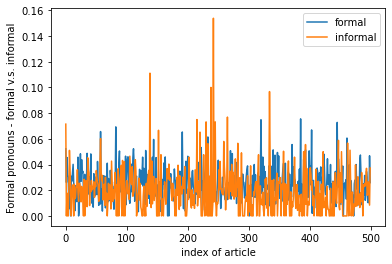

<Figure size 432x288 with 0 Axes>

In [30]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_fotone_formal, label="formal")
plt.plot(index, avg_nr_fotone_informal, label="informal")
plt.legend()
plt.ylabel("Formal pronouns - formal v.s. informal")
plt.xlabel("index of article")
plt.show()
plt.savefig('formal_p.png')

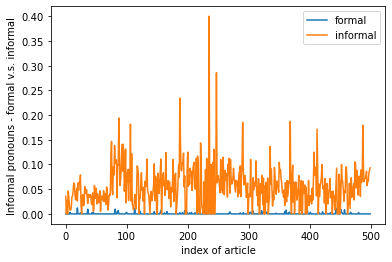

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(index, avg_nr_infotone_formal, label="formal")
plt.plot(index, avg_nr_infotone_informal, label="informal")
plt.legend()
plt.ylabel("Informal pronouns - formal v.s. informal")
plt.xlabel("index of article")
plt.show()
plt.savefig('informal_p.png')

In [32]:
formal_word_list = read_list("features/formal_list.txt")

In [33]:
informal_word_list = read_list("features/informal_list.txt")

### Contractions

In [34]:
contraction = read_list("features/contraction.txt")

In [35]:
nr_cont_formal   =np.array( [check_tone_nr(para, contraction) for para in formal_articles])
nr_cont_informal =np.array( [check_tone_nr(para, contraction) for para in informal_articles])

In [36]:
avg_nr_cont_formal = nr_cont_formal/fword_length
avg_nr_cont_informal= nr_cont_informal/infword_length

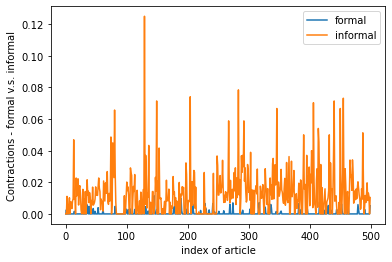

<Figure size 432x288 with 0 Axes>

In [37]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_cont_formal, label="formal")
plt.plot(index, avg_nr_cont_informal, label="informal")
plt.legend()
plt.ylabel("Contractions - formal v.s. informal")
plt.xlabel("index of article")
plt.show()
plt.savefig('contract.png')

### 3.4 Formal and informal word list

In [38]:
check_word_phrasal(formal_articles_in_sentences[51], informal_word_list)

39

In [39]:
nr_fword_formal =np.array( [check_word_phrasal(para, formal_word_list) for para in formal_articles_in_sentences])
nr_infword_formal   = np.array([check_word_phrasal(para, informal_word_list) for para in formal_articles_in_sentences])
nr_fword_informal =np.array([check_word_phrasal(para, formal_word_list) for para in informal_articles_in_sentences])
nr_inword_informal   = np.array([check_word_phrasal(para, informal_word_list) for para in informal_articles_in_sentences])

avg_nr_fword_formal = nr_fword_formal/fword_length
avg_nr_infword_formal = nr_infword_formal/fword_length
avg_nr_fword_informal= nr_fword_informal/infword_length
avg_nr_infword_informal = nr_inword_informal/infword_length

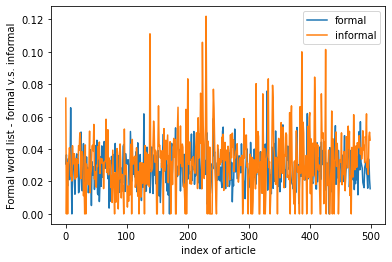

<Figure size 432x288 with 0 Axes>

In [40]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_fword_formal, label="formal")
plt.plot(index, avg_nr_fword_informal, label="informal")
plt.legend()
plt.ylabel("Formal word list - formal v.s. informal")
plt.xlabel("index of article")
plt.show()
plt.savefig('formal_w.png')

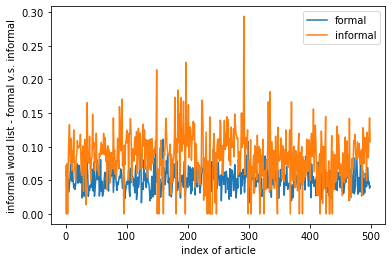

<Figure size 432x288 with 0 Axes>

In [41]:
index  = np.arange(document_nr)
plt.plot(index, avg_nr_infword_formal, label="formal")
plt.plot(index, avg_nr_infword_informal, label="informal")
plt.legend()
plt.ylabel("informal word list - formal v.s. informal")
plt.xlabel("index of article")
plt.show()
plt.savefig('infomal_w.png')

### Phrasal verbs

### 3.5 Building datasets/features

In [93]:
#7 features
avg_word_sentence =  np.concatenate((avg_word_sentence_formal, avg_word_sentence_informal), axis=None)
avg_word_length    = np.concatenate((avg_formal_word_length, avg_formal_word_length), axis=None)
avg_letter_sentence = np.concatenate((avg_letter_sentence_formal, avg_letter_sentence_informal), axis=None)
norm_pass = np.concatenate((norm_formal_pass, norm_informal_pass), axis=None)
avg_nr_fotone = np.concatenate((avg_nr_fotone_formal, avg_nr_fotone_informal), axis=None)
avg_nr_infotone = np.concatenate((avg_nr_infotone_formal, avg_nr_infotone_informal), axis=None)
avg_nr_infword = np.concatenate((avg_nr_infword_formal, avg_nr_infword_informal), axis=None)
avg_nr_fword = np.concatenate((avg_nr_fword_formal, avg_nr_fword_informal), axis=None)
avg_nr_cont = np.concatenate((avg_nr_cont_formal, avg_nr_cont_informal), axis=None)


In [132]:
#X = np.array([avg_nr_infword])
X  = np.array([avg_letter_sentence,avg_word_sentence,avg_word_length, norm_pass,avg_nr_fotone,avg_nr_infotone,avg_nr_cont, avg_nr_fword, avg_nr_infword])
X.shape
five_and_eight =  np.array([avg_nr_infotone, avg_nr_infword])
deci_best  = np.array([avg_letter_sentence, avg_nr_fotone, avg_nr_infotone, avg_nr_cont, avg_nr_fword, avg_nr_infword])


In [95]:
# Build output array
y_train_r = np.array([y_train])
y_test_r = np.array([y_test])

In [96]:
X_train_real  = []
for index in X_train:
    X_train_real.append(X[:, index])
    
X_train_r2 = np.array(X_train_real).reshape(len(X[:,1]),len(X_train_real))

In [97]:
X_test_real = []
for index in X_test:
    X_test_real.append(X[:, index])
X_test_r2 = np.array(X_test_real).reshape(len(X[:,1]),len(X_test_real))
X_test_r2.shape

(9, 250)

In [98]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    # (≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1 / (1 + np.exp(-z))

    # YOUR CODE ENDS HERE

    return s


### 4.1 Logistic Regression

In [121]:
d = nn.model(np.array(five_and_eight), np.array(Y), np.array(five_and_eight), np.array(Y), num_iterations=2000, learning_rate=0.05, print_cost=True)
print(d["w"])


train accuracy: 91.5 %
test accuracy: 91.5 %
[[-1.35087206]
 [-0.83951545]]


In [125]:
#sklearn library
import sklearn.linear_model as lm
clf = lm.LogisticRegression(random_state=0).fit(np.array(five_and_eight).T,np.array(Y).T)
print("test: " , clf.score(np.array(five_and_eight).T,np.array(Y).T))
#print("test: " , clf.score( np.array(X_train_r2).T, np.array(y_train_r).T))
[w] = clf.coef_
b = clf.intercept_
print("w",clf.coef_)
print("b",clf.intercept_)

test:  0.908
w [[-9.62491931 -5.79703978]]
b [0.66125403]


In [131]:
sigmoid(five_and_eight.T[300].dot(np.array(w))+b)


array([0.63812792])

### 4.2 Decision Tree

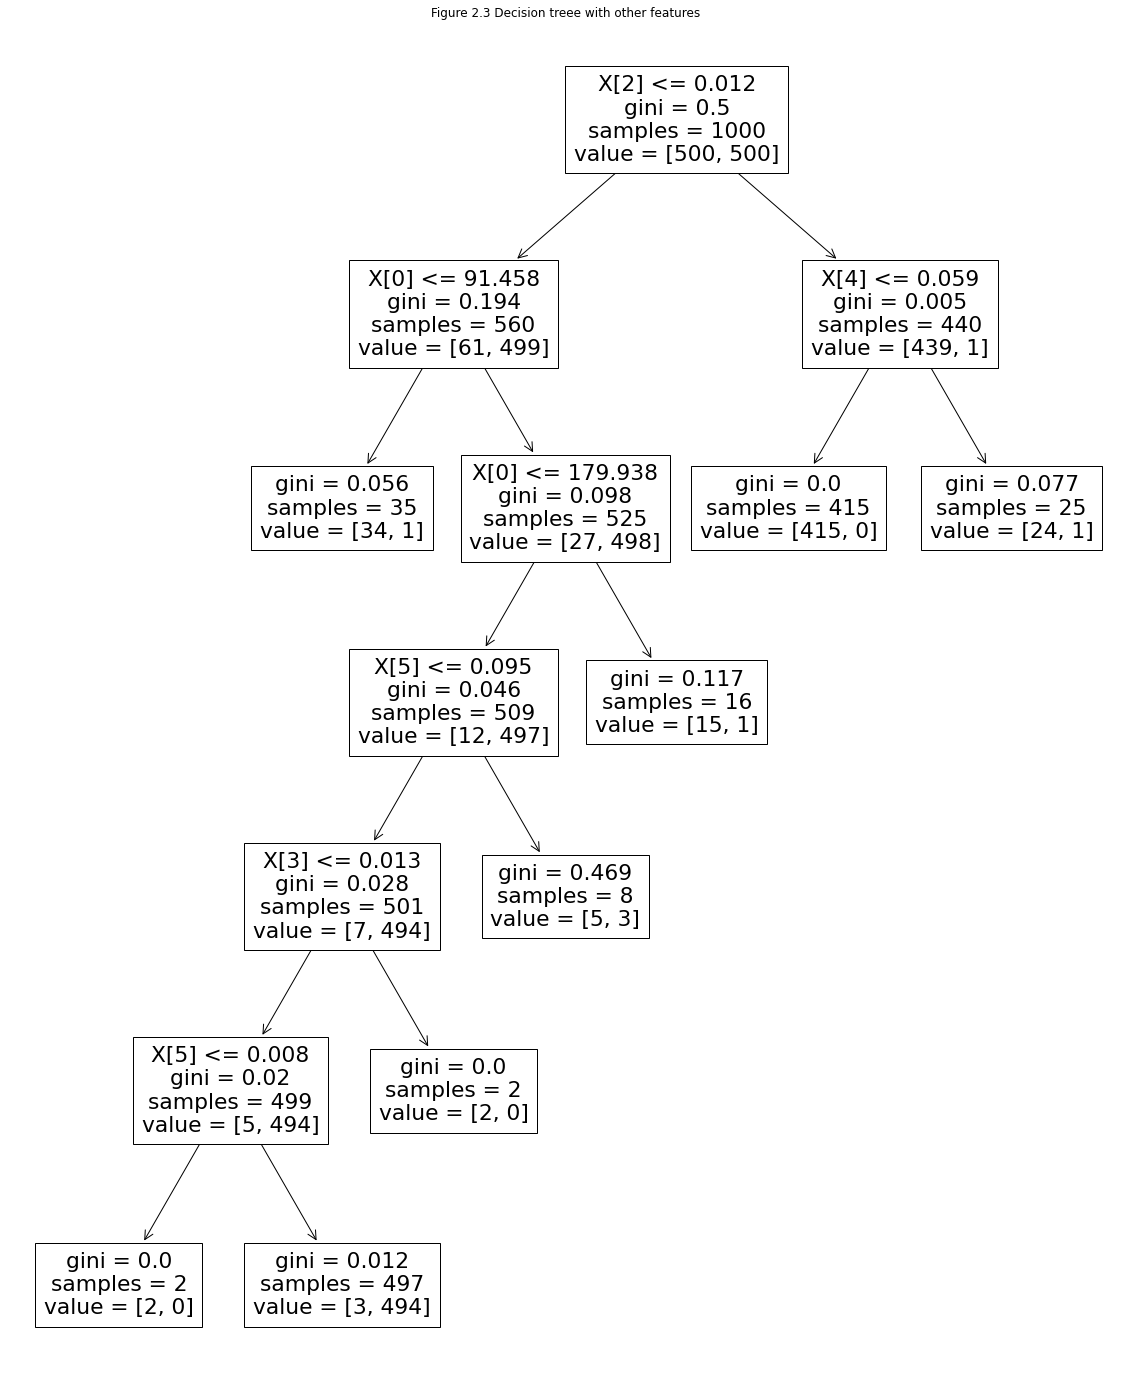

accuracy of this train model is: 0.991
accuracy of this test model is: 0.991


In [161]:
mss = 50
md=6
deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md) # min_samples_split： minumum samples requires to split
deci_tree  = deci_tree.fit(np.array(deci_best).T,np.array(Y).T)
plt.figure(figsize=(20,25))
tree.plot_tree(deci_tree) 
plt.title("Figure 2.3 Decision treee with other features")
plt.show()
train_predict = deci_tree.predict(np.array(deci_best).T)

accu = accuracy_score(np.array(Y).T, train_predict)
print("accuracy of this train model is:", accu )
test_predict = deci_tree.predict(deci_best.T)

accu = accuracy_score(np.array(Y).T, test_predict)
print("accuracy of this test model is:", accu )

In [103]:
print(np.corrcoef(avg_word_sentence,avg_letter_sentence)) 
# print("The first two features are correlated")

[[1.         0.97559066]
 [0.97559066 1.        ]]


### 4.3 feature selection

In [104]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

important features: [5 8]
Optimal numbers of features:2
accuracy:  0.9099999999999999
ranking:  [8 7 6 2 4 1 3 5 1]


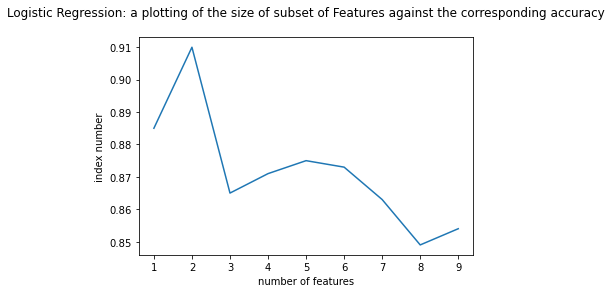

In [105]:
# deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split= mss)
# rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(10))
# rfecv.fit(np.array(X).T,np.array(Y).T)
logreg = lm.LogisticRegression(solver='liblinear')
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=logreg, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(X).T,np.array(Y).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)
# for feat in list_features:
#     print(classNames[feat])

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("index number")
print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])
print("ranking: ", rfecv.ranking_)
plt.title("Logistic Regression: a plotting of the size of subset of Features against the corresponding accuracy\n")
plt.show()

important features: [0 1 3 5 6 7 8]
Optimal numbers of features:7
accuracy:  0.99
ranking:  [1 1 3 1 2 1 1 1 1]


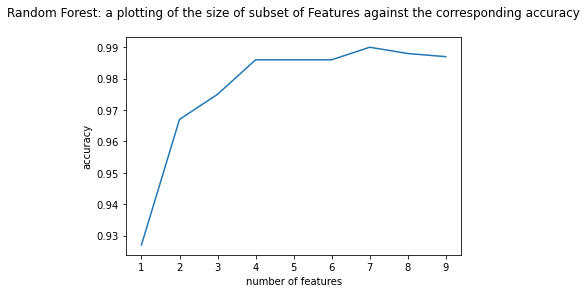

In [151]:
# deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split= mss)
# rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(10))
# rfecv.fit(np.array(X).T,np.array(Y).T)
logreg = lm.LogisticRegression()
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=forest, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(X).T,np.array(Y).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)
# for feat in list_features:
#     print(classNames[feat])

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])
print("ranking: ", rfecv.ranking_)

plt.title("Random Forest: a plotting of the size of subset of Features against the corresponding accuracy\n")
plt.show()

important features: [0 4 5 6 7 8]
Optimal numbers of features:6
accuracy:  0.982
ranking:  [1 4 3 2 1 1 1 1 1]


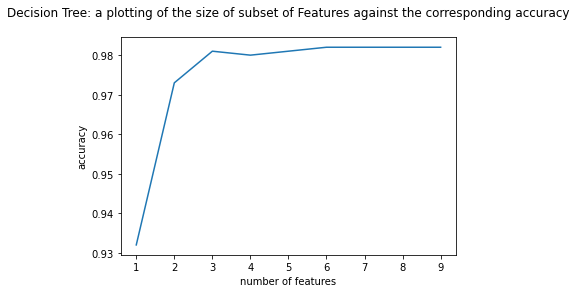

In [162]:
deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)
# rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(10))
# rfecv.fit(np.array(X).T,np.array(Y).T)
# logreg = lm.LogisticRegression()
# forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(X).T,np.array(Y).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)
# for feat in list_features:
#     print(classNames[feat])

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1),rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])
print("ranking: ", rfecv.ranking_)
plt.title("Decision Tree: a plotting of the size of subset of Features against the corresponding accuracy\n")
plt.show()

In [108]:
#rfecv.grid_scores_.shape (7,1
#np.array(X).T.shape
#credit: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

x_scaled = np.array(X).T
y_s = np.array(Y).T
lr = lm.LogisticRegression(solver='liblinear')
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(x_scaled,y_s):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append( lr.score(x_test_fold, y_test_fold))
print('List of possible accuracy for logistic regression:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy for logistic regression: [0.86, 0.82, 0.83, 0.88, 0.85, 0.82, 0.85, 0.88, 0.93, 0.82]

Maximum Accuracy That can be obtained from this model is: 93.0 %

Minimum Accuracy: 82.0 %

Overall Accuracy: 85.39999999999999 %

Standard Deviation is: 0.03533962208186289


In [163]:
#rfecv.grid_scores_.shape (7,1
#np.array(X).T.shape
#credit: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(five_and_eight).T
y_s = np.array(Y).T
lr =  tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(five_and_eight).T,np.array(Y).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy for decision tree:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy for decision tree: [0.96, 0.98, 0.97, 0.95, 0.96, 0.97, 0.98, 0.95, 0.98, 0.96]

Maximum Accuracy That can be obtained from this model is: 98.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 96.6 %

Standard Deviation is: 0.011737877907772684


In [154]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(X).T
y_s = np.array(Y).T
lr =  RandomForestClassifier(random_state=101)
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(X).T,np.array(Y).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy for random forest:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy for random forest: [1.0, 1.0, 0.98, 1.0, 0.97, 0.99, 0.99, 0.97, 0.99, 0.98]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 97.0 %

Overall Accuracy: 98.7 %

Standard Deviation is: 0.011595018087284067


In [60]:
y_s.shape

(1000,)

In [61]:
# scaler = preprocessing.MinMaxScaler()
# x_scaled = np.array(X).T
# y_s = np.array(Y).T
# lr = lm.deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)
# # Create StratifiedKFold object.
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# lst_accu_stratified = []
# for train_index, test_index in skf.split(np.array(X).T,np.array(Y).T):
#     x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
#     y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
#     lr.fit(x_train_fold, y_train_fold)
#     test_predict = lr.predict(x_test_fold)
#     lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
# print('List of possible accuracy:', lst_accu_stratified)
# print('\nMaximum Accuracy That can be obtained from this model is:',
#       max(lst_accu_stratified)*100, '%')
# print('\nMinimum Accuracy:',
#       min(lst_accu_stratified)*100, '%')
# print('\nOverall Accuracy:',
#       mean(lst_accu_stratified)*100, '%')
# print('\nStandard Deviation is:', stdev(lst_accu_stratified))

In [62]:
%%cmd
pip install -U scikit-learn

Microsoft Windows [Version 10.0.18363.1977]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Seraph\Documents\Radboud\Bachelor Thesis>pip install -U scikit-learn
Requirement already up-to-date: scikit-learn in c:\users\seraph\anaconda3\lib\site-packages (1.0.2)

C:\Users\Seraph\Documents\Radboud\Bachelor Thesis>

### 4.3 K-nearest neighbor

In [63]:
# # adapted from assignment 6 from data mining course Radboud University
# from scipy.io import loadmat
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from toolbox import classification_plot as cp
# import seaborn as sn





# def plot_confusion_matrix(cm,y):
    
#     df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
#                   columns = [i+1 for i in np.unique(y)])
#     plt.figure()
#     sn.heatmap(df_cm, annot=True)
#     plt.title('Confusion matrix')
#     plt.xlabel('Predicted class')
#     plt.ylabel('Actual class')
#     plt.show()


# knn_neighbor = KNeighborsClassifier(metric = 'euclidean')
# knn_neighbor.fit(X_train_r2.T,y_train_r.T)
# pred = knn_neighbor.predict(X_test_r2.T)
# # cp.classification_plot(X_test_r2.T, y_test_r.T, pred,X_train_r2.T,y_train_r.T)
# # plt.xlabel("x")
# # plt.ylabel("y")
# # plt.title("3.1 KNN classifier with grades features")
# # plt.show()

# acc= accuracy_score(pred, y_test)
# error = 1-acc
# cm = confusion_matrix(y_test, pred)

# plot_confusion_matrix(cm, y_test)
# #acc, error = metrics(cm)
# print('Accuracy: ', acc, 'Error rate: ', error)

In [64]:
classone = pd.read_excel('formal.xlsx',header = None)
classone_articles  = list(para.lower() for para in classone.values[:,0])
classtwo = pd.read_excel('informal.xlsx',header = None)
classtwo_articles  = list(para.lower() for para in classtwo.values[:,0])
classthree = pd.read_excel('semi-formalsemi-informal.xlsx', header = None)
classthree_articles  = list(para.lower() for para in classthree.values[:,0])



def articles_size(articles):
    articles_size = []
    for article in articles:
        articles_size.append(len(article))
        
    return articles_size

class_one_size = articles_size(classone_articles)
class_two_size = articles_size(classtwo_articles)
class_three_size = articles_size(classthree_articles)

print("Total formal article: ",len(classone_articles))
print("average: ",np.average(class_one_size))
print("max",np.max(class_one_size))
print("min",np.min(class_one_size))
print("Total semi-formal/informal article: ",len(classtwo_articles))
print("average: ",np.average(class_two_size))
print("max",np.max(class_two_size))
print("min",np.min(class_two_size))
print("Total informal article: ",len(classthree_articles))
print("average: ",np.average(class_three_size))
print("max",np.max(class_three_size))
print("min",np.min(class_three_size))

Total formal article:  50
average:  5650.36
max 32767
min 926
Total semi-formal/informal article:  50
average:  9855.82
max 32767
min 429
Total informal article:  50
average:  5629.32
max 14370
min 1010


In [65]:
classone_articles_in_sentences =  list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in classone_articles)
classtwo_articles_in_sentences =  list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in classtwo_articles)
classthree_articles_in_sentences =  list(list(item.strip() for item in nltk.tokenize.sent_tokenize(article)) for article in classthree_articles)

classone_articles_sentence_number = np.array(list(len(ls) for ls in classone_articles_in_sentences), dtype=np.float)
classtwo_articles_sentence_number = np.array(list(len(ls) for ls in classtwo_articles_in_sentences), dtype=np.float)
classthree_articles_sentence_number = np.array(list(len(ls) for ls in classthree_articles_in_sentences), dtype=np.float)

# new_word_list_each_sentence_in_an_article_formal = []
# new_word_nr_formal = []
# for para in new_formal_test_articles_in_sentences:
#     new_para = []
#     word_nr = []
#     for sent in para:
#         sent_in_word  = nltk.tokenize.word_tokenize(sent)
#         word_nr.append(len(sent_in_word))
#         new_para.append(sent_in_word)
#     new_word_nr_formal.append(word_nr)

# new_word_number_formal_list = np.array(list(sum(para) for para in new_word_nr_formal),dtype=np.float)#= np.array(word_nr_formal), dtype=np.float)
class_one_word_length  = np.array([len(art.split()) for art in classone_articles])
class_two_word_length  = np.array([len(art.split()) for art in classtwo_articles])
class_three_word_length  = np.array([len(art.split()) for art in classthree_articles])

classone_article_length = np.array(list(len(para) for para in classone_articles), dtype=np.float)
classtwo_article_length = np.array(list(len(para) for para in classtwo_articles), dtype=np.float)
classthree_article_length = np.array(list(len(para) for para in classthree_articles), dtype=np.float)

classone_avg_letter_sentence = classone_article_length/classone_articles_sentence_number
classtwo_avg_letter_sentence = classone_article_length/classtwo_articles_sentence_number
classthree_avg_letter_sentence = classone_article_length/classthree_articles_sentence_number

classone_avg_word_sentence = class_one_word_length/classone_articles_sentence_number
classtwo_avg_word_sentence= class_two_word_length/classone_articles_sentence_number
classthree_avg_word_sentence = class_three_word_length/classone_articles_sentence_number

classone_word_length =  classone_article_length/ class_one_word_length
classtwo_word_length =  classtwo_article_length/ class_two_word_length
classthree_word_length =  classthree_article_length/ class_three_word_length

classone_pass = list(check_pass_art(para) for para in classone_articles_in_sentences)
classtwo_pass = list(check_pass_art(para) for para in classtwo_articles_in_sentences)
classthree_pass = list(check_pass_art(para) for para in classthree_articles_in_sentences)

classone_norm_pass = classone_pass/classone_articles_sentence_number
classtwo_norm_pass = classtwo_pass/classtwo_articles_sentence_number
classthree_norm_pass = classthree_pass/classthree_articles_sentence_number

classone_nr_infotone   =np.array( [check_tone_nr(para, informal_pronoun_list) for para in classone_articles])
classone_nr_fotone = np.array( [check_tone_nr(para, formal_pronoun_list) for para in classone_articles])
classtwo_nr_infotone = np.array( [check_tone_nr(para, informal_pronoun_list) for para in classtwo_articles])
classtwo_nr_fotone = np.array( [check_tone_nr(para, formal_pronoun_list) for para in classtwo_articles])
classthree_nr_infotone   = np.array( [check_tone_nr(para, informal_pronoun_list) for para in classthree_articles])
classthree_nr_fotone = np.array( [check_tone_nr(para, formal_pronoun_list) for para in classthree_articles])

classone_avg_nr_fotone = classone_nr_fotone/class_one_word_length
classone_avg_nr_infotonel = classone_nr_infotone/class_one_word_length
classtwo_avg_nr_fotone = classtwo_nr_fotone/class_two_word_length
classtwo_avg_nr_infotonel = classtwo_nr_infotone/class_two_word_length
classthree_avg_nr_fotone = classthree_nr_fotone/class_three_word_length
classthree_avg_nr_infotonel = classthree_nr_infotone/class_three_word_length

classone_nr_cont = np.array( [check_tone_nr(para, contraction) for para in classone_articles])
classtwo_nr_cont = np.array( [check_tone_nr(para, contraction) for para in classtwo_articles])
classthree_nr_cont = np.array( [check_tone_nr(para, contraction) for para in classthree_articles])

classone_avg_nr_cont = classone_nr_cont/class_one_word_length
classtwo_avg_nr_cont = classtwo_nr_cont/class_two_word_length
classthree_avg_nr_cont = classthree_nr_cont/class_three_word_length

classone_nr_fword =np.array([check_word_phrasal(para, formal_word_list) for para in classone_articles_in_sentences])
classtwo_nr_fword =np.array([check_word_phrasal(para, formal_word_list) for para in classtwo_articles_in_sentences])
classthree_nr_fword =np.array([check_word_phrasal(para, formal_word_list) for para in classthree_articles_in_sentences])

classone_nr_infword   = np.array([check_word_phrasal(para, informal_word_list) for para in classone_articles_in_sentences])
classtwo_nr_infword   = np.array([check_word_phrasal(para, informal_word_list) for para in classtwo_articles_in_sentences])
classthree_nr_infword   = np.array([check_word_phrasal(para, informal_word_list) for para in classthree_articles_in_sentences])

classone_avg_nr_fword = classone_nr_fword/class_one_word_length
classtwo_avg_nr_fword = classtwo_nr_fword/class_two_word_length
classthree_avg_nr_fword = classthree_nr_fword/class_three_word_length

classone_avg_nr_infword = classone_nr_infword/class_one_word_length
classtwo_avg_nr_infword = classtwo_nr_infword/class_two_word_length
classthree_avg_nr_infword = classthree_nr_infword/class_three_word_length

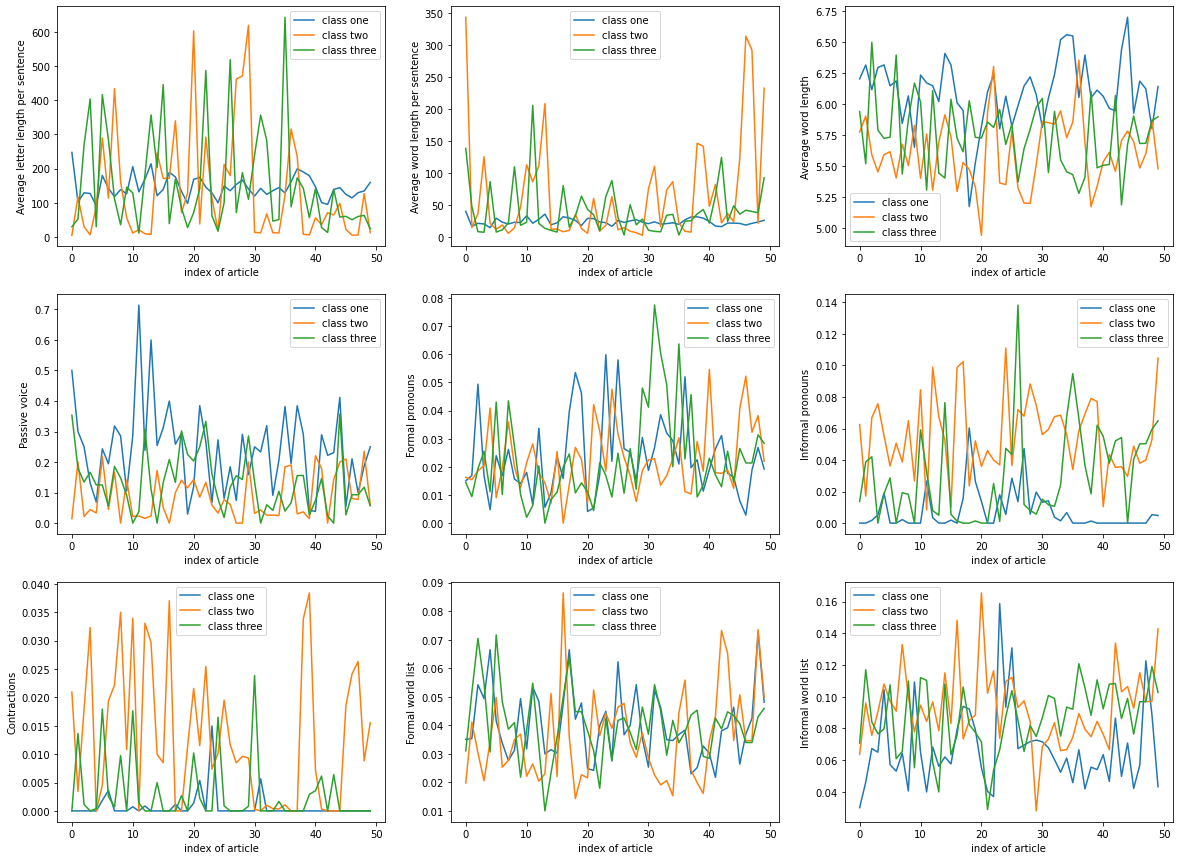

In [66]:
index  = np.arange(50)
plt.figure(figsize=(20, 15))

plt.subplot(331)
plt.plot(index, classone_avg_letter_sentence, label="class one")
plt.plot(index, classtwo_avg_letter_sentence, label="class two")
plt.plot(index, classthree_avg_letter_sentence, label="class three")
plt.ylabel("Average letter length per sentence")
plt.xlabel("index of article")
plt.legend()

plt.subplot(332)
plt.plot(index, classone_avg_word_sentence, label="class one")
plt.plot(index, classtwo_avg_word_sentence, label="class two")
plt.plot(index, classthree_avg_word_sentence, label="class three")
plt.ylabel("Average word length per sentence")
plt.xlabel("index of article")
plt.legend()


plt.subplot(333)
plt.plot(index, classone_word_length, label="class one")
plt.plot(index, classtwo_word_length, label="class two")
plt.plot(index, classthree_word_length, label="class three")
plt.ylabel("Average word length")
plt.xlabel("index of article")
plt.legend()


plt.subplot(334)
plt.plot(index, classone_norm_pass, label="class one")
plt.plot(index, classtwo_norm_pass, label="class two")
plt.plot(index, classthree_norm_pass, label="class three")
plt.ylabel("Passive voice")
plt.xlabel("index of article")
plt.legend()

plt.subplot(335)
plt.plot(index, classone_avg_nr_fotone, label="class one")
plt.plot(index, classtwo_avg_nr_fotone, label="class two")
plt.plot(index, classthree_avg_nr_fotone, label="class three")
plt.ylabel("Formal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(336)
plt.plot(index, classone_avg_nr_infotonel, label="class one")
plt.plot(index, classtwo_avg_nr_infotonel, label="class two")
plt.plot(index, classthree_avg_nr_infotonel, label="class three")
plt.ylabel("Informal pronouns")
plt.xlabel("index of article")
plt.legend()

plt.subplot(337)
plt.plot(index, classone_avg_nr_cont, label="class one")
plt.plot(index, classtwo_avg_nr_cont, label="class two")
plt.plot(index, classthree_avg_nr_cont, label="class three")
plt.ylabel("Contractions")
plt.xlabel("index of article")
plt.legend()

plt.subplot(338)
plt.plot(index, classone_avg_nr_fword, label="class one")
plt.plot(index, classtwo_avg_nr_fword, label="class two")
plt.plot(index, classthree_avg_nr_fword, label="class three")
plt.ylabel("Formal world list")
plt.xlabel("index of article")
plt.legend()

plt.subplot(339)
plt.plot(index, classone_avg_nr_infword, label="class one")
plt.plot(index, classtwo_avg_nr_infword, label="class two")
plt.plot(index, classthree_avg_nr_infword, label="class three")
plt.ylabel("Informal world list")
plt.xlabel("index of article")
plt.legend()

plt.show()

In [213]:
avg_letter_sentence = np.concatenate((classone_avg_letter_sentence, classtwo_avg_letter_sentence, classthree_avg_letter_sentence), axis=None)
avg_word_sentence = np.concatenate((classone_avg_word_sentence, classtwo_avg_word_sentence, classthree_avg_word_sentence), axis=None)
avg_word_length = np.concatenate((classone_word_length, classtwo_word_length, classthree_word_length), axis=None)
norm_pass = np.concatenate((classone_norm_pass, classtwo_norm_pass, classthree_norm_pass), axis=None)
avg_nr_fotone = np.concatenate((classone_avg_nr_fotone, classtwo_avg_nr_fotone, classthree_avg_nr_fotone), axis=None)
avg_nr_infotonel = np.concatenate((classone_avg_nr_infotonel, classtwo_avg_nr_infotonel, classthree_avg_nr_infotonel), axis=None)
avg_nr_cont = np.concatenate((classone_avg_nr_cont, classtwo_avg_nr_cont, classthree_avg_nr_cont), axis =None)
avg_nr_fword = np.concatenate((classone_avg_nr_fword, classtwo_avg_nr_fword, classthree_avg_nr_fword), axis =None)
avg_nr_infword = np.concatenate((classone_avg_nr_infword, classtwo_avg_nr_infword, classthree_avg_nr_infword), axis =None)

In [214]:
features= np.array([avg_letter_sentence, avg_word_sentence, avg_word_length, norm_pass,avg_nr_fotone,avg_nr_infotonel,avg_nr_cont, avg_nr_fword, avg_nr_infword])

In [215]:
labels  =  np.array([1]*50 + [2]*50 +[3]*50)

In [216]:
# print("logistic regression", clf.score(features.T, labels))

# test_predict = deci_tree.predict(features.T)
# print("decision tree: ",accuracy_score(labels.T, test_predict))
avg_letter_sentence.shape


(150,)

In [217]:
scaler = preprocessing.MinMaxScaler()
x_s = np.array(features).T
y_s = np.array(labels).T
lr = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(features).T,np.array(labels).T):
    x_train_fold, x_test_fold = x_s[train_index], x_s[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.6, 0.8, 0.7333333333333333, 0.8, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.6, 0.6666666666666666, 0.9333333333333333]

Maximum Accuracy That can be obtained from this model is: 93.33333333333333 %

Minimum Accuracy: 46.666666666666664 %

Overall Accuracy: 66.66666666666666 %

Standard Deviation is: 0.14740554623801777


In [218]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(features).T
y_s = np.array(labels).T
lr =forest = RandomForestClassifier(random_state=101)
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(features).T,np.array(labels).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    test_predict = lr.predict(x_test_fold)
    lst_accu_stratified.append( accuracy_score(y_test_fold, test_predict) )
print('List of possible accuracy for decision tree:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy for decision tree: [0.7333333333333333, 0.8, 0.5333333333333333, 0.8, 0.6, 0.6666666666666666, 0.6, 0.6666666666666666, 0.8, 0.8]

Maximum Accuracy That can be obtained from this model is: 80.0 %

Minimum Accuracy: 53.333333333333336 %

Overall Accuracy: 70.0 %

Standard Deviation is: 0.1006153904237491


In [219]:
scaler = preprocessing.MinMaxScaler()
x_scaled = np.array(features).T
y_s = np.array(labels).T
lr = lm.LogisticRegression(multi_class='ovr', solver='liblinear') #solver='lbfgs', max_iter=180
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(np.array(features).T,np.array(labels).T):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_s[train_index], y_s[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append( lr.score(x_test_fold, y_test_fold))
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.6, 0.6, 0.4666666666666667, 0.5333333333333333, 0.4, 0.4666666666666667, 0.4]

Maximum Accuracy That can be obtained from this model is: 60.0 %

Minimum Accuracy: 40.0 %

Overall Accuracy: 50.0 %

Standard Deviation is: 0.07200822998230953


important features: [2 5]
Optimal numbers of features:2
:  0.6733333333333332


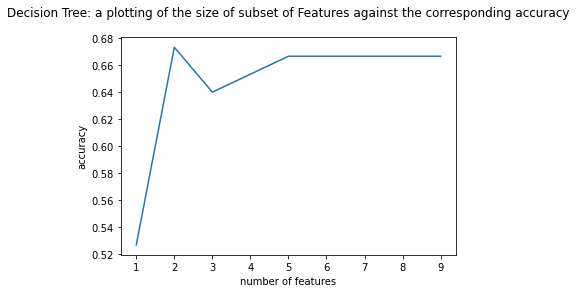

In [220]:
deci_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=mss,max_depth=md)
rfecv =  RFECV(estimator=deci_tree, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(features).T,np.array(labels).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)
# for feat in list_features:
#     print(classNames[feat])

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print(": ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])

plt.title("Decision Tree: a plotting of the size of subset of Features against the corresponding accuracy\n")
plt.show()

important features: [0 1 2 5]
Optimal numbers of features:4
:  0.7133333333333334


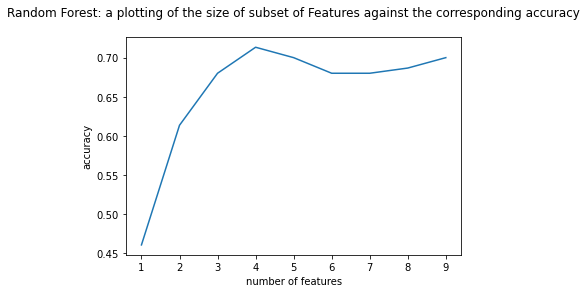

In [221]:
logreg = lm.LogisticRegression()
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=forest, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(features).T,np.array(labels).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)
# for feat in list_features:
#     print(classNames[feat])

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print(": ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_-1])

plt.title("Random Forest: a plotting of the size of subset of Features against the corresponding accuracy\n")
plt.show()

important features: [3 5]
Optimal numbers of features:2
accuracy:  0.52


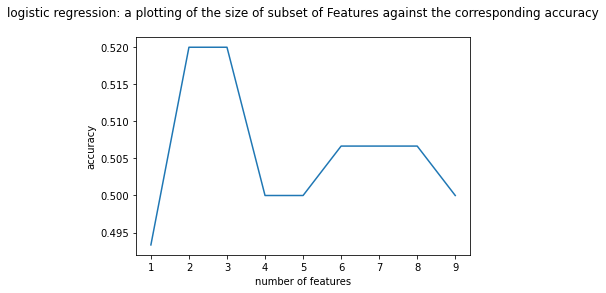

In [222]:
logreg = lm.LogisticRegression(multi_class='ovr', solver='liblinear')
forest = RandomForestClassifier(random_state=101)
rfecv =  RFECV(estimator=logreg, step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
rfecv.fit(np.array(features).T,np.array(labels).T)
list_features  = np.where(rfecv.support_ == True)[0]
print("important features:", list_features)
# for feat in list_features:
#     print(classNames[feat])

print('Optimal numbers of features:{}'.format(rfecv.n_features_))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("number of features")
plt.ylabel("accuracy")

print("accuracy: ",rfecv.cv_results_['mean_test_score'][rfecv.n_features_ -1])

plt.title("logistic regression: a plotting of the size of subset of Features against the corresponding accuracy\n")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=13d9f500-6870-493e-8979-fe2132174966' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>